# EFC1 GCC253 - Complexidade e Projeto de Algoritmos


> **Prof.: Douglas H. S. Abreu**


**Aluno**: Marco Antônio Magalhães

**Matricula**: 202010138

**Turma**: 10A

Link do repositório GitHub: https://github.com/lieko0/EFC1-GCC-253

● O trabalho deve ser feito em grupos de no máximo 2 componentes (todos devem enviar a atividade no Campus Virtual)

● Trabalhos entregues após a data limite não serão aceitos

● Data limite de entrega: 26 de Julho de 2022 : 23h55m

● Enviar o trabalho para o campus virtual, do seguinte modo: link do repositório GitHub e do Colab para acesso ao Notebook. A Documentação deve estar no readme

● O trabalho deve ser desenvolvido no modelo Notebook utilizando a linguagem Python

# Importações e Variáveis globais

In [ ]:
import numpy as np
import time
import math
import matplotlib.pyplot as plt
from random import randint
global_1=0

# Funções de Ordenação

> Utilize este espaço para definir as funções de ordenação vista em sala de aula



In [ ]:
def gera_arranjos_aleatorio(n_elementos):
  A=np.random.randint(0, 100, (n_elementos))
  return A

##  Insertion Sort


In [ ]:
def insertionSort(arranjo):
  comp = 0
  for j in range (1,len(arranjo)):
    comp+=1
    chave=arranjo[j]
    i=j-1
    while i>=0 and arranjo[i]>chave:
      comp+=1
      arranjo[i+1]=arranjo[i]
      i=i-1
    comp+=1
    arranjo[i+1]=chave
  comp+=1

  return arranjo, comp

##  Merge Sort


In [ ]:
def algoMerge(A,p,q,r):
  comp = 0
  n1 = q-p+1
  n2 = r-q
  L = [0] * (n1)
  R = [0] * (n2)
  for i in range(0,n1):
    comp+=1
    L[i] = float(A[p+i])
  comp+=1
  for j in range(0,n2):
    comp+=1
    R[j] = float(A[q+1+j])
  comp+=1
  # print(f'   :{L} - {R}')
  i=0
  j=0
  k = p
  while i < n1 and j < n2:
    comp+=1
    comp+=1
    if L[i] <= R[j]:
      A[k]=L[i]
      i+=1
    else: 
      A[k]=R[j]
      j+=1
    k += 1
  comp+=1
  while i < n1:
    comp+=1
    A[k] = L[i]
    i += 1
    k += 1
  comp+=1
  while j < n2:
    comp+=1
    A[k] = R[j]
    j += 1
    k += 1
  comp+=1

  return comp

def algoMergeSort(p,r,A):
  comp = 1
  if p < r:
    q = p+(r-p)//2
    A, comp0 = algoMergeSort(p,q,A)
    comp+=comp0
    A, comp0 = algoMergeSort(q+1,r,A)
    comp+=comp0
    comp+= algoMerge(A,p,q,r)
  return A, comp

##  Selection Sort


In [ ]:
def selectionSort(A):
  comp=1
  for i in range(len(A)-1):
    comp+=1
    min_idx = i
    comp+=1
    for j in range(i+1, len(A)):
      comp+=2
      if A[min_idx] > A[j]:
        min_idx = j
    A[i], A[min_idx] = A[min_idx], A[i]
  return A, comp
  

##  Bubble Sort


In [ ]:
def algoBubble(arranjo): 
  comp = 1                   
  alterado = True                       
  for i in range(0,len(arranjo)):
    comp+=1
    comp+=1            
    if(alterado == True):               
      alterado = False                  
      for j in range(0,len(arranjo)-i-1):
        comp+=1
        comp+=1     
        if(arranjo[j]>arranjo[j+1]):              
          arranjo[j+1], arranjo[j] = arranjo[j], arranjo[j+1] 
          alterado = True             
      comp+=1                 
  comp+=1
  return arranjo, comp                      
                                      

## Heap Sort

In [ ]:
def heapify(arranjo, n, i):
  comp = 0
  largest = i 
  l = 2 * i + 1 
  r = 2 * i + 2 
  comp+=1
  if l < n and arranjo[i] < arranjo[l]:
    largest = l

  comp+=1
  if r < n and arranjo[largest] < arranjo[r]:
    largest = r

  comp+=1
  if largest != i:
    arranjo[i],arranjo[largest] = arranjo[largest],arranjo[i]
    comp += heapify(arranjo, n, largest)
  return comp

def heapSort(arranjo):
  n = len(arranjo)
  comp = 1
  for i in range(n // 2 - 1, -1, -1):
    comp += 1
    comp += heapify(arranjo, n, i)

  comp+=1
  for i in range(n-1, 0, -1):
    comp+=1
    arranjo[i], arranjo[0] = arranjo[0], arranjo[i]
    comp += heapify(arranjo, i, 0)

  return arranjo, comp



## Quick Sort

> pivo = *A[A-comprimento]*

In [ ]:
def partition(l, r, arranjo):
  comp = 0
  pivot, ptr = arranjo[r], l
  comp += 1
  for i in range(l, r):
    comp += 2
    if arranjo[i] <= pivot:
      arranjo[i], arranjo[ptr] = arranjo[ptr], arranjo[i]
      ptr += 1
  arranjo[ptr], arranjo[r] = arranjo[r], arranjo[ptr]
  return ptr, comp

def quicksort(l, r, arranjo):
  comp = 1
  if len(arranjo) == 1: 
    return arranjo
  comp += 1
  if l < r:
    pi, comp0 = partition(l, r, arranjo)
    comp += comp0
    arranjo, comp0 = quicksort(l, pi-1, arranjo)
    comp += comp0
    arranjo, comp0 = quicksort(pi+1, r, arranjo)
    comp += comp0
  return arranjo, comp

In [ ]:
def quicksortR(l, r, arranjo):
    if(l >= r):
        return
    p = arranjo[randint(l,r-1)]
    i = l - 1
    j = r + 1
    while(1):
        while(1):           
            i += 1
            if(arranjo[i] >= p):
                break
        while(1):               
            j -= 1
            if(arranjo[j] <= p):
                break
        if(i >= j):
            break
        arranjo[i],arranjo[j] = arranjo[j],arranjo[i]
    quicksortR(arranjo, l, j)
    quicksortR(arranjo, j+1, r)
    return arranjo

# Teste e plotagem

In [ ]:
def test( n):
  arrayRandom = gera_arranjos_aleatorio(n)
  print(arrayRandom)
  print(np.sort(arrayRandom))
  arr, co = algoMergeSort(0, len(arrayRandom)-1, arrayRandom)
  print(arr)
  print(co)

test(10)



[79 46 60  8 41 73 56 58 99 97]
[ 8 41 46 56 58 60 73 79 97 99]
[ 8 41 46 56 58 60 73 79 97 99]
153


In [ ]:
def grafico(function0):
  ns = []
  compRandom = []
  compOrdered = []
  compInverted = []
  for n in range(5,1000,5):
    arrayRandom = gera_arranjos_aleatorio(n)
    arrayOrdered = np.sort(arrayRandom)
    arrayInverted = np.flip(arrayOrdered)
    ns.append((n))
    result = function0(arrayRandom)
    compRandom.append((result[1]))
    result = function0(arrayOrdered)
    compOrdered.append((result[1]))
    result = function0(arrayInverted)
    compInverted.append((result[1]))
  return ns, compRandom, compOrdered, compInverted

def grafico2param(function0):
  ns = []
  compRandom = []
  compOrdered = []
  compInverted = []
  for n in range(5,1000,5):
    arrayRandom = gera_arranjos_aleatorio(n)
    arrayOrdered = np.sort(arrayRandom)
    arrayInverted = np.flip(arrayOrdered)
    ns.append((n))
    result = function0(0, len(arrayRandom)-1,arrayRandom)
    compRandom.append((result[1]))
    result = function0(0, len(arrayOrdered)-1,arrayOrdered)
    compOrdered.append((result[1]))
    result = function0(0, len(arrayInverted)-1,arrayInverted)
    compInverted.append((result[1]))
  return ns, compRandom, compOrdered, compInverted

def grafico2paramOnlyRand(function0):
  ns = []
  compRandom = []
  for n in range(5,1000,5):
    arrayRandom = gera_arranjos_aleatorio(n)
    ns.append((n))
    result = function0(0, len(arrayRandom)-1,arrayRandom)
    compRandom.append((result[1]))
  return ns, compRandom

def grafico2paramOnlyInverted(function0):
  ns = []
  compInverted = []
  for n in range(5,1000,5):
    arrayRandom = gera_arranjos_aleatorio(n)
    arrayOrdered = np.sort(arrayRandom)
    arrayInverted = np.flip(arrayOrdered)
    ns.append((n))
    result = function0(0, len(arrayInverted)-1,arrayInverted)
    compInverted.append((result[1]))
  return ns, compInverted

def grafico2paramOnlyOrdered(function0):
  ns = []
  compInverted = []
  for n in range(5,1000,5):
    arrayRandom = gera_arranjos_aleatorio(n)
    arrayOrdered = np.sort(arrayRandom)
    ns.append((n))
    result = function0(0, len(arrayOrdered)-1,arrayOrdered)
    compInverted.append((result[1]))
  return ns, compOrdered

def plotar(function0):
  nu, c1_rand, c2_ord, c3_inv = grafico(function0)
  plt.plot(nu, c1_rand, label='rand')
  print(1)
  plt.plot(nu, c2_ord, label='ordered')
  print(2)
  plt.plot(nu, c3_inv, label='inverted')
  print(3)
  plt.xlabel("( n )")
  plt.ylabel("( comparações )")
  plt.legend()
  plt.show()
def plotarTwo(function0):
  nu, c1_rand, c2_ord, c3_inv = grafico2param(function0)
  plt.plot(nu, c1_rand, label='rand')
  print(1)
  plt.plot(nu, c2_ord, label='ordered')
  print(2)
  plt.plot(nu, c3_inv, label='inverted')
  print(3)
  plt.xlabel("( n )")
  plt.ylabel("( comparações )")
  plt.legend()
  plt.show()
def plotarTwoRandOnly(function0):
  nu, c1_rand = grafico2paramOnlyRand(function0)
  plt.plot(nu, c1_rand, label='rand')
  print(1)
  plt.xlabel("( n )")
  plt.ylabel("( comparações )")
  plt.legend()
  plt.show()

1
2
3


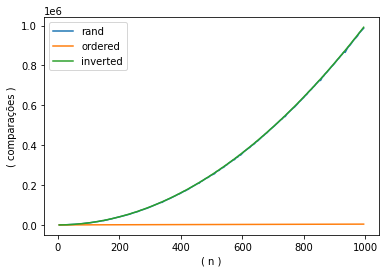

# Questões



1.   Dado um conjunto de arranjos ***A[5,...,1000, passo=5]***
**Obs.:** para os algoritmos QuickSort e Merge Sort mostre apenas um melhor e um pior caso. faça a comparação com os demais métodos com o conjunto ***A*** apenas em casos aleatórios.

> a) Defina o melhor e pior caso para cada um dos algoritmos definidos acima, crie vetores ***A*** para estes casos e faça a comparação gráficamente também com casos aleatórios (plote um gráfico para cada algoritmo). Conte o numero de comparações realzizadas para cada uma das execuções.

### ● Insertion Sort
* Melhor caso = Arranjo ordenado 
* Caso médio = Arranjo aleatório
* Pior caso = Arranjo ordenado invertido


1
2
3


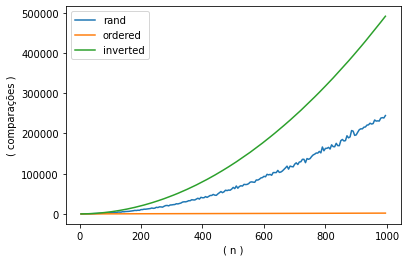

In [ ]:
plotar(insertionSort)

O gráfico representa o que foi previsto.

### ● Bubble Sort

* Melhor caso = Arranjo ordenado 
* Caso médio = Arranjo aleatório
* Pior caso = Arranjo ordenado invertido




1
2
3


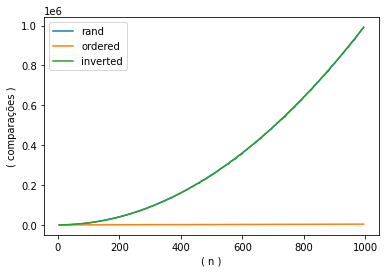

In [ ]:
plotar(algoBubble)

O caso médio e o pior caso possuem a mesma complexidade, portanto, apresentam comportamento parecido.


### ● Selection Sort

*  Melhor caso = Caso médio = Pior caso => ~Mesmo número de operações



1
2
3


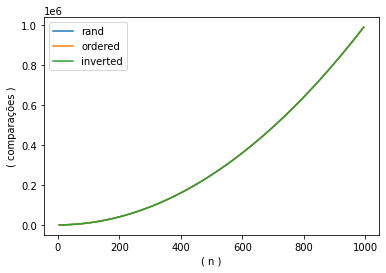

In [ ]:
plotar(selectionSort)

Em todas as situações o comportamento é similar, no quesito número de comparações.

### ● Heap Sort

* Melhor caso = Caso médio = Pior caso => ~Mesmo número de operações


1
2
3


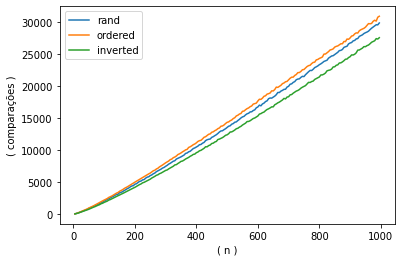

In [ ]:
plotar(heapSort)

### ● Quick Sort

* Melhor caso = Selecionar exatamente o pivot certo em todas interações
* Caso médio = Arranjo aleatório
*  Pior caso => Arranjo ordenado invertido (pivot = elemento mais a direita)


1


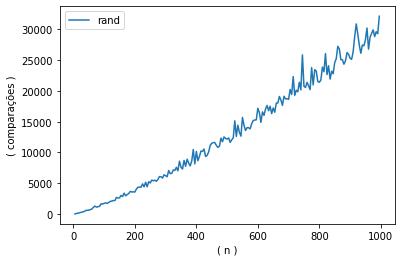

In [ ]:
plotarTwoRandOnly(quicksort)


### ● Merge Sort
* Melhor caso = Caso médio = Pior caso => ~Mesmo número de operações



1
2
3


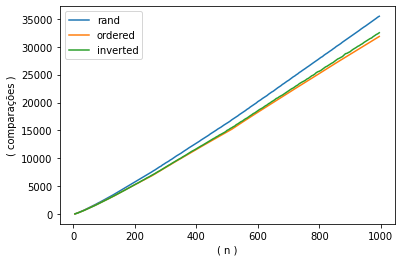

In [ ]:
plotarTwo(algoMergeSort)



> b) Repita o procedimento acima. Porém compare os algoritmos para pior e melhor caso e também casos aleatórios.

In [226]:
nu, in_rand, in_ord, in_inv = grafico(insertionSort)
nu, bu_rand, bu_ord, bu_inv = grafico(algoBubble)
nu, se_rand, se_ord, se_inv = grafico(selectionSort)
nu, he_rand, he_ord, he_inv = grafico(heapSort)
nu, qu_rand = grafico2paramOnlyRand(quicksort)
nu, me_rand, me_ord, me_inv = grafico2param(algoMergeSort)




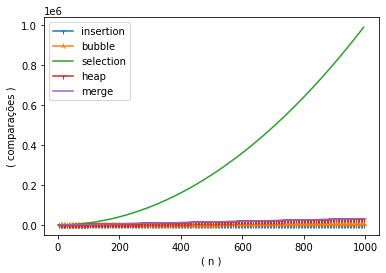

In [ ]:
plt.plot(nu, in_ord, marker='1', label='insertion')
plt.plot(nu, bu_ord, marker='2', label='bubble')
plt.plot(nu, se_ord, label='selection')
plt.plot(nu, he_ord, marker='1', label='heap')
plt.plot(nu, me_ord, label='merge')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()

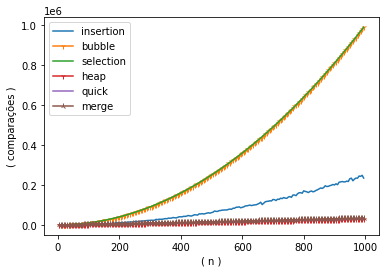

In [ ]:
plt.plot(nu, in_rand, label='insertion')
plt.plot(nu, bu_rand, marker='1', label='bubble')
plt.plot(nu, se_rand, label='selection')
plt.plot(nu, he_rand, marker='1', label='heap')
plt.plot(nu, qu_rand, label='quick')
plt.plot(nu, me_rand, marker='2', label='merge')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()

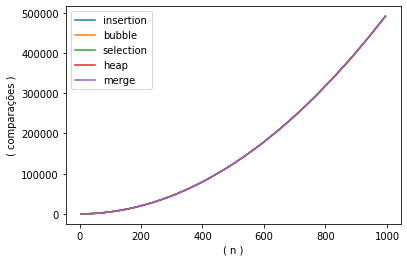

In [ ]:
plt.plot(nu, in_inv, label='insertion')
plt.plot(nu, in_inv, label='bubble')
plt.plot(nu, in_inv, label='selection')
plt.plot(nu, in_inv, label='heap')
plt.plot(nu, in_inv, label='merge')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()



> c) Qual é o comportamento assintótico para cada um dos algorítmos acima (melhor caso e pior caso, se puder, analise também em casos aleatórios)

● Insertion Sort
* Melhor caso = O(n)
* Caso médio = O(n2)
* Pior caso = O(n2)
* No gráfico da questão anterior é possível perceber a tendendia quadrática do caso médio e do pior. É possível perceber também a tendencia linear do melhor caso.

● Bubble Sort
* Melhor caso = O(n)
* Caso médio = O(n2)
* Pior caso = O(n2)
* No gráfico da questão anterior é possível perceber a tendendia quadrática do caso médio e do pior. É possível perceber também a tendencia linear do melhor caso.

● Selection Sort
* Melhor caso = O(n2)
* Caso médio = O(n2)
* Pior caso = O(n2)
* No gráfico da questão anterior é possível perceber a tendendia quadrática independente da configuração do arranjo.

● Heap Sort
* Melhor caso = O(n log(n))
* Caso médio = O(n log(n))
* Pior caso = O(n log(n))
* No gráfico da questão anterior é possível perceber a tendendia similar entre os casos.

● Quick Sort
* Melhor caso = O(n log(n))
* Caso médio = O(n log(n))
* Pior caso = O(n2)

● Merge Sort
* Melhor caso = O(n log(n))
* Caso médio = O(n log(n))
* Pior caso = O(n log(n))
* No gráfico da questão anterior é possível perceber a tendendia similar entre os casos.


2.   Desenvolda uma versão aleatorizada do QUICKSORT (pivo aleatório) e compare com a versão apresentada em sala de aula e definida acima.



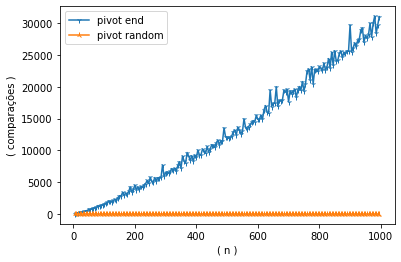

In [ ]:
nu, qu_rand = grafico2paramOnlyRand(quicksort)
nu, qu2_rand = grafico2paramOnlyRand(quicksortR)

plt.plot(nu, qu_rand, marker='1', label='pivot end')
plt.plot(nu, qu2_rand, marker='2', label='pivot random')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()

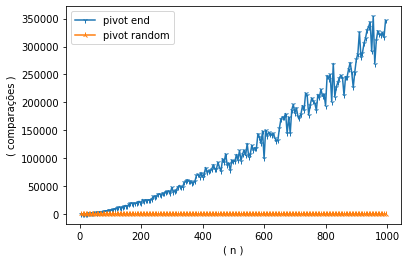

In [ ]:
nu, qu_rand = grafico2paramOnlyInverted(quicksort)
nu, qu2_rand = grafico2paramOnlyInverted(quicksortR)

plt.plot(nu, qu_rand, marker='1', label='pivot end')
plt.plot(nu, qu2_rand, marker='2', label='pivot random')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()

In [224]:
nu, qu2_rand = grafico2paramOnlyOrdered(quicksortR)
nu, qu_rand = grafico2paramOnlyOrdered(quicksort)

plt.plot(nu, qu_rand, marker='1', label='pivot end')
plt.plot(nu, qu2_rand, marker='2', label='pivot random')
plt.xlabel("( n )")
plt.ylabel("( comparações )")
plt.legend()
plt.show()

RecursionError: ignored

Pelos gráficos é perceptível que há uma diferença gritente entre o número de comparações realizadas pelos dois modelos. Sendo que o primeiro algortimo nem roda em situações de vetor ordenado pois estoura o limite de número de recursões permitido. 
O segundo método utiliza o particionamento de Hoare, enquanto o primeiro utiliza Lomuto, isso pode ter interferido muito nos resultados.  

In [ ]:
print("Boa sorte!!!")

Boa sorte!!!
